In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 110kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

Celem zadania jest obliczenie maksymalnego prądu jaki może przepłynąć przez układ.

Ponizej został przedstawiony schemat układu wraz z wartością rezystancji poszczególnych rezystorów. Poniżej przedstawione zostały również wartości aksymalne prądów płynących przez dane rezystory.

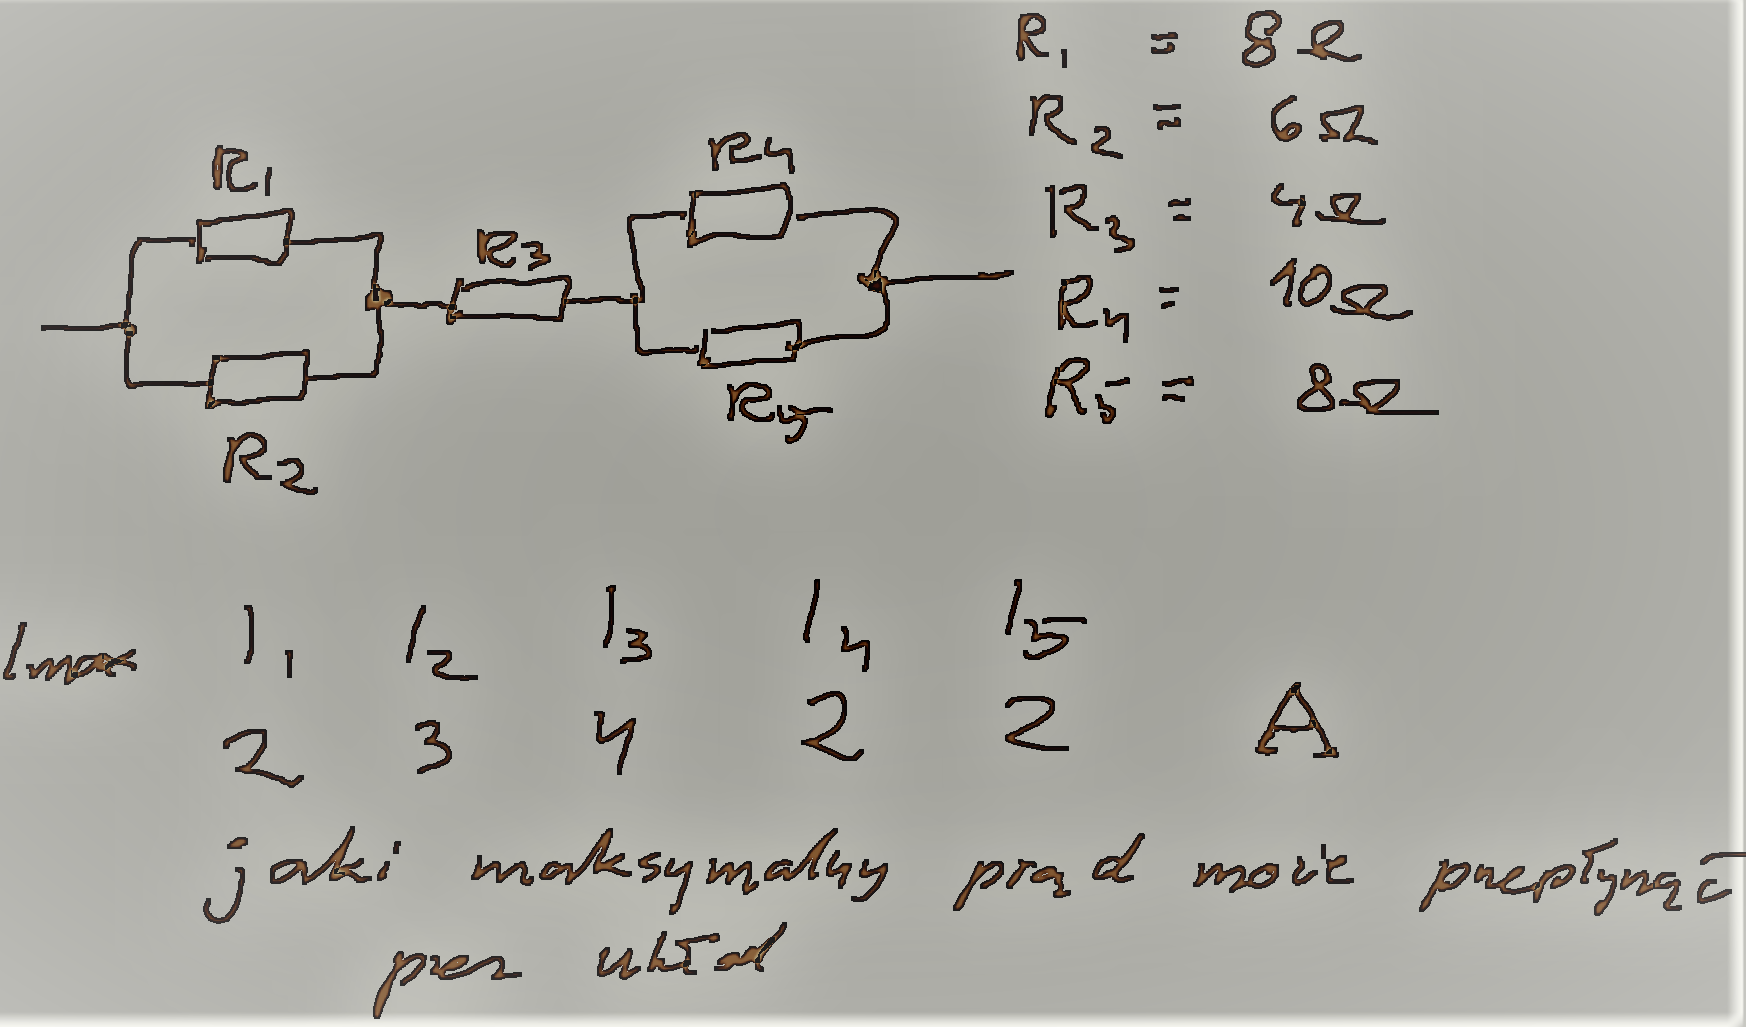

In [ ]:
from pulp import *
#print(pulp.__version__)

#Stworzenie problemu
prob = LpProblem("Maksymalizacja_pradu",LpMaximize)

#Wartości rezystancji
R = [8,6,4,10,8]

#Zmienne decyzyjne (prądy na rezystorach)
I1=LpVariable("I1",0,None,LpContinuous)
I2=LpVariable("I2",0,None,LpContinuous)
I3=LpVariable("I3",0,None,LpContinuous)
I4=LpVariable("I4",0,None,LpContinuous)
I5=LpVariable("I5",0,None,LpContinuous)

#prad calkowity

Ic = I3 
prob += Ic

#z praw Kirchhoffa

prob += I1 + I2 == I3 
prob += I4 + I5 == I3 

#ograniczenia pradow

prob += I1 <= 2
prob += I2 <= 3
prob += I3 <= 4
prob += I4 <= 2
prob += I5 <= 2

prob.writeLP("rezo.lp")
prob.solve()

varsdict = {}

k = 0
for l in prob.variables():
    varsdict[l.name,"U"+str(k+1)] = str(l.varValue), l.varValue*R[k]
    k += 1

#!cat "rezo.lp"

#Wyświetlenie wyników na ekranie
print("Maksymalny prąd to {}A, \nPrąd na rezystorze [A], Napięcie na rezystorze [V]: {}".format(value(prob.objective),varsdict))

Maksymalny prąd to 4.0A, 
Prąd na rezystorze [A], Napięcie na rezystorze [V]: {('I1', 'U1'): ('1.0', 8.0), ('I2', 'U2'): ('3.0', 18.0), ('I3', 'U3'): ('4.0', 16.0), ('I4', 'U4'): ('2.0', 20.0), ('I5', 'U5'): ('2.0', 16.0)}
